# Linear Regression 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Food-Truck-LineReg.csv",header=None)

In [3]:
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### Graph for the Extracted Data Plotted 

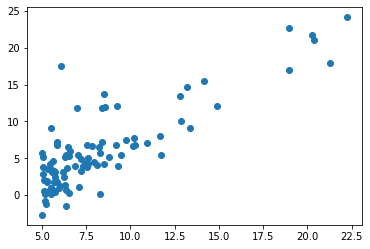

In [4]:
x,y=df[0],df[1]
plt.scatter(x,y,alpha=1)

### HeatMap to visualize the Correlation 

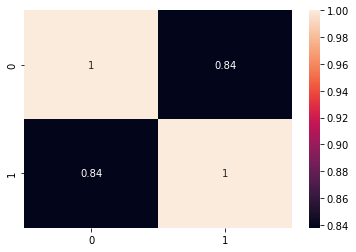

In [5]:
ax = sns.heatmap(df.corr(), annot=True)

In [6]:
df[1].corr(df[0])

0.837873232526341

In [7]:
df.columns=["x","y"]

### To Calculate the ($x^{2}$ , $y^{2}$ & $xy$)

In [8]:
xsqr=[]
ysqr=[]
xy=[]

for i in range (len(df)):
    xsqr.append(round(df.x[i]**2,4))
    ysqr.append(round(df.y[i]**2,4))
    xy.append(round(df.x[i]*df.y[i],4))

df["x^2"]=xsqr
df["y^2"]=ysqr
df["xy"]=xy

In [9]:
df

,x,y,x^2,y^2,xy
0,6.1101,17.59200,37.3333,309.4785,107.4889
1,5.5277,9.13020,30.5555,83.3606,50.4690
2,8.5186,13.66200,72.5665,186.6502,116.3811
3,7.0032,11.85400,49.0448,140.5173,83.0159
4,5.8598,6.82330,34.3373,46.5574,39.9832
...,...,...,...,...,...
92,5.8707,7.20290,34.4651,51.8818,42.2861
93,5.3054,1.98690,28.1473,3.9478,10.5413
94,8.2934,0.14454,68.7805,0.0209,1.1987
95,13.3940,9.05510,179.3992,81.9948,121.2840


### Standard Deviations 

In [10]:
def avg(lx):
    sum=0
    for it in lx:
        sum=sum+it
    return sum/len(lx)

In [11]:
def sdv(xcolo):
    temp=0
    for it in xcolo:
        temp = temp+(it-avg(xcolo))**2
        
    variance=temp/len(xcolo)
    sdv=(variance)**(1/2)
    return sdv

In [12]:
sdx=sdv(df['x'])

In [13]:
sdy=sdv(df['y'])

In [14]:
print (sdx)
print (sdy)

3.849883995922716
5.48178525707763


In [15]:
def summation(sums):
    return avg(sums)*len(df)

In [16]:
xsqured=summation(df['x^2'])
ysqured=summation(df['y^2'])
xy=summation(df['xy'])

### Calculating the Coeffiecient of Regression ($r$)

In [17]:
r=xy/(xsqured*ysqured)

In [18]:
r

0.0001289798537942054

### Caculating the Slope ($m$)

In [19]:
m= r * sdy/sdx

In [20]:
m

0.0001836522507529852

#### Applying the Linear Regression Formula 

In [21]:
#c=y-mx
c= avg(df['y'])-m*avg(df['x'])

In [22]:
c

5.8376364859106955

### To Calculate the Predicted y ie. $\overline{y}$

In [23]:
#y=mx+c
y_predict=m*df['x']+c

In [24]:
y_predict

0     5.838759
1     5.838652
2     5.839201
3     5.838923
4     5.838713
        ...   
92    5.838715
93    5.838611
94    5.839160
95    5.840096
96    5.838635
Name: x, Length: 97, dtype: float64

In [25]:
df['y_predict']=y_predict

In [26]:
df

,x,y,x^2,y^2,xy,y_predict
0,6.1101,17.59200,37.3333,309.4785,107.4889,5.838759
1,5.5277,9.13020,30.5555,83.3606,50.4690,5.838652
2,8.5186,13.66200,72.5665,186.6502,116.3811,5.839201
3,7.0032,11.85400,49.0448,140.5173,83.0159,5.838923
4,5.8598,6.82330,34.3373,46.5574,39.9832,5.838713
...,...,...,...,...,...,...
92,5.8707,7.20290,34.4651,51.8818,42.2861,5.838715
93,5.3054,1.98690,28.1473,3.9478,10.5413,5.838611
94,8.2934,0.14454,68.7805,0.0209,1.1987,5.839160
95,13.3940,9.05510,179.3992,81.9948,121.2840,5.840096


### To Calculate the ($y$- $\overline{y}$ and $y$- $y^{2}$)

In [27]:
y_sub_y_predict=y-y_predict

In [28]:
y_sub_y_predict_sqr = y_sub_y_predict**2

In [29]:
df['y_sub_y_predict']=y_sub_y_predict
df['y_sub_y_predict_sqr']=y_sub_y_predict_sqr

In [30]:
df

,x,y,x^2,y^2,xy,y_predict,y_sub_y_predict,y_sub_y_predict_sqr
0,6.1101,17.59200,37.3333,309.4785,107.4889,5.838759,11.753241,138.138683
1,5.5277,9.13020,30.5555,83.3606,50.4690,5.838652,3.291548,10.834290
2,8.5186,13.66200,72.5665,186.6502,116.3811,5.839201,7.822799,61.196185
3,7.0032,11.85400,49.0448,140.5173,83.0159,5.838923,6.015077,36.181156
4,5.8598,6.82330,34.3373,46.5574,39.9832,5.838713,0.984587,0.969412
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,34.4651,51.8818,42.2861,5.838715,1.364185,1.861002
93,5.3054,1.98690,28.1473,3.9478,10.5413,5.838611,-3.851711,14.835676
94,8.2934,0.14454,68.7805,0.0209,1.1987,5.839160,-5.694620,32.428692
95,13.3940,9.05510,179.3992,81.9948,121.2840,5.840096,3.215004,10.336249


#### Calculating $SSE$

In [31]:
SSE = summation(df['y_sub_y_predict_sqr'])

In [32]:
SSE

2914.2170922941423

#### Calculating $SST$

In [33]:
a=avg(df['y'])
SST=summation((y-a)**2)

In [34]:
SST

2914.8470516572247

#### Calculating $SSR$

In [35]:
SSR = summation((y_predict-avg(y_predict))**2)

In [36]:
SSR

4.8490820407663433e-05

#### Calculating the Square Of the Coefficients $r^{2}$

In [37]:
rsqr = 1-(SSE/SST)

In [38]:
rsqr

0.0002161208982558449

### Linear Regression Plotting 

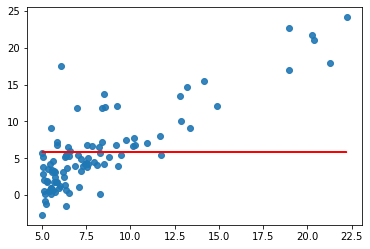

In [39]:
plt.scatter(x,y,alpha=0.9)
plt.plot(x,y_predict,color='red')